In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
# World Health Organization has set limits for some of the components in the water to determine the portability.

# They are 
# a) ph = (min:6.5, max:8.5)
# b) Solids = (max:1000)
# c) Chloramines = (max:4)
# d) Sulfate = (range(3,30))
# e) Conductivity = (max:400)
# f) Organic_carbon = (max:2)
# g) Trihalomethanes = (max:80)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Checking if the Target variable is balanced

Target Variable Balance:
 0    1998
1    1278
Name: Potability, dtype: int64


Text(0.5, 1.0, 'Potability Distribution')

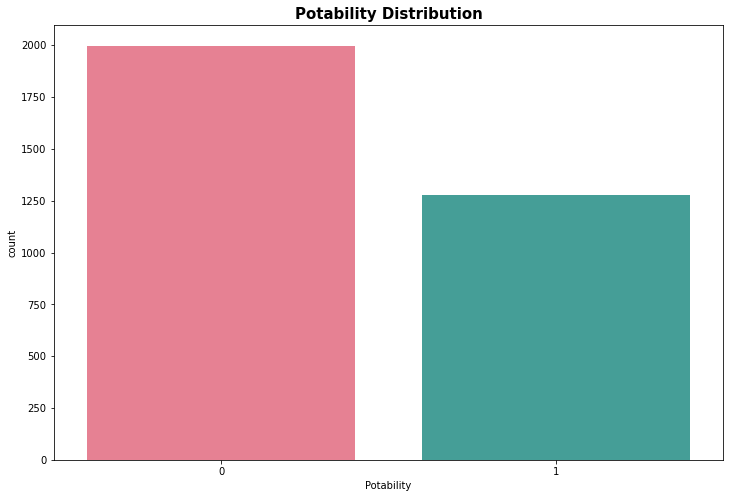

In [5]:
class_balance =df['Potability'].value_counts()
print('Target Variable Balance:\n',class_balance)
plt.figure(figsize=(12,8))
sns.countplot(data = df, x='Potability', palette = 'husl')
plt.title('Potability Distribution',size = 15, weight = 'bold')

Target Variable has a ratio of 61% to 39% ratio. This dataset is not a highly imbalanced dataset. However balancing the target variable may help in our analysis but I am not performing any technique like SMOTE for this analysis

# Handling Missing Values

In [6]:
#pip install missingno

Null Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


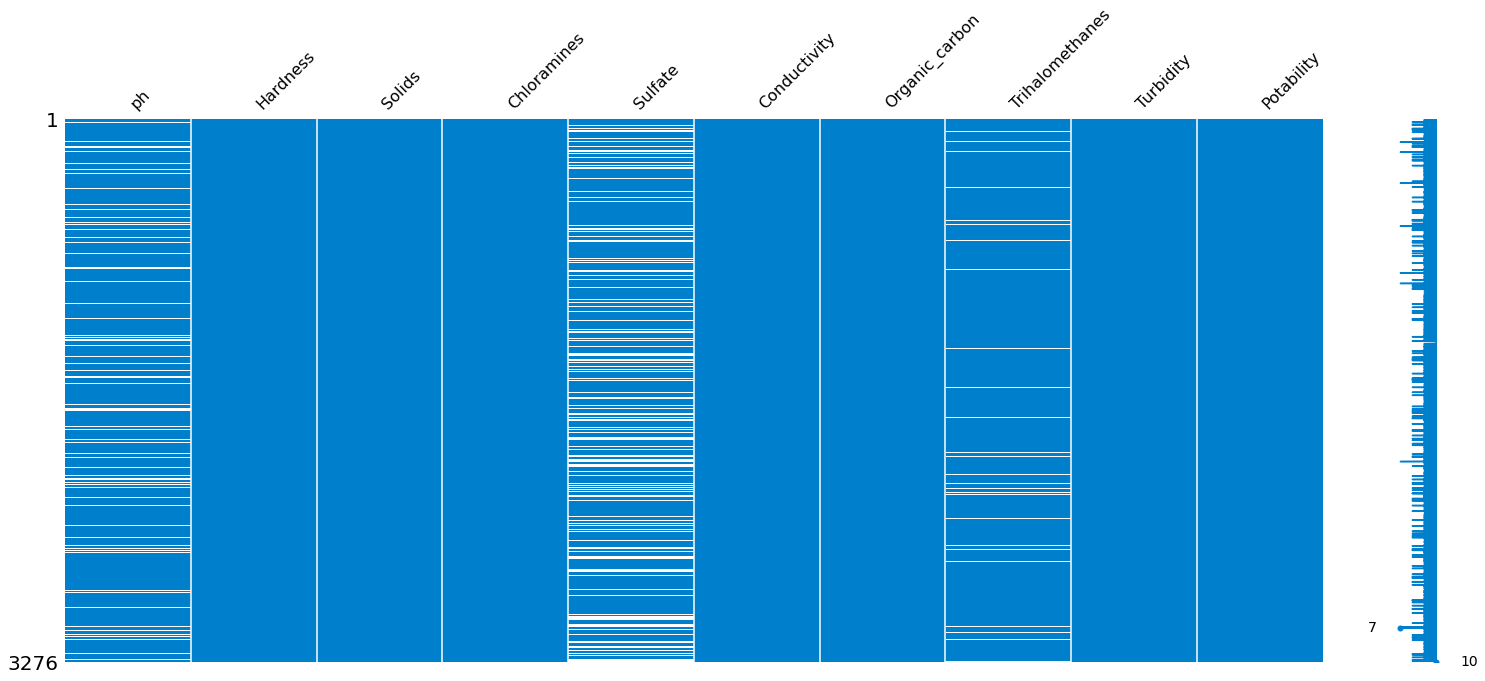

In [7]:
null_info = df.isnull().sum()

import missingno as msno

fig = msno.matrix(df,color=(0,0.5,0.8))

print('Null Values:\n',null_info)

We have null values in 3 variables. Let's deal with them first. We will check how the values are distributed in these columns

<AxesSubplot:>

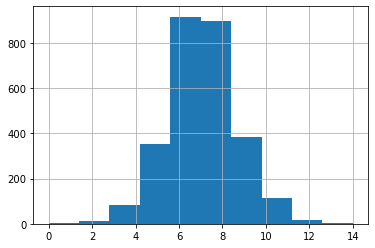

In [8]:
df['ph'].hist()

<AxesSubplot:>

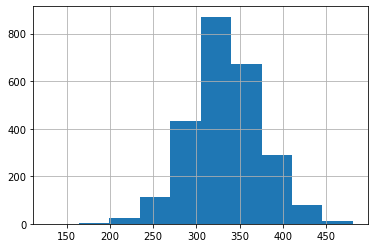

In [9]:
df['Sulfate'].hist()

<AxesSubplot:>

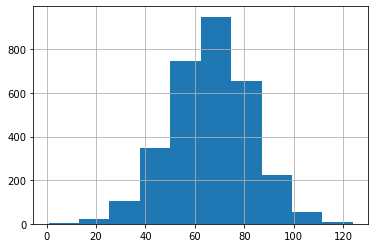

In [10]:
df['Trihalomethanes'].hist()

With the distribution of these columns seen, we can replace the missing values with the mean value.

In [11]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())


<AxesSubplot:>

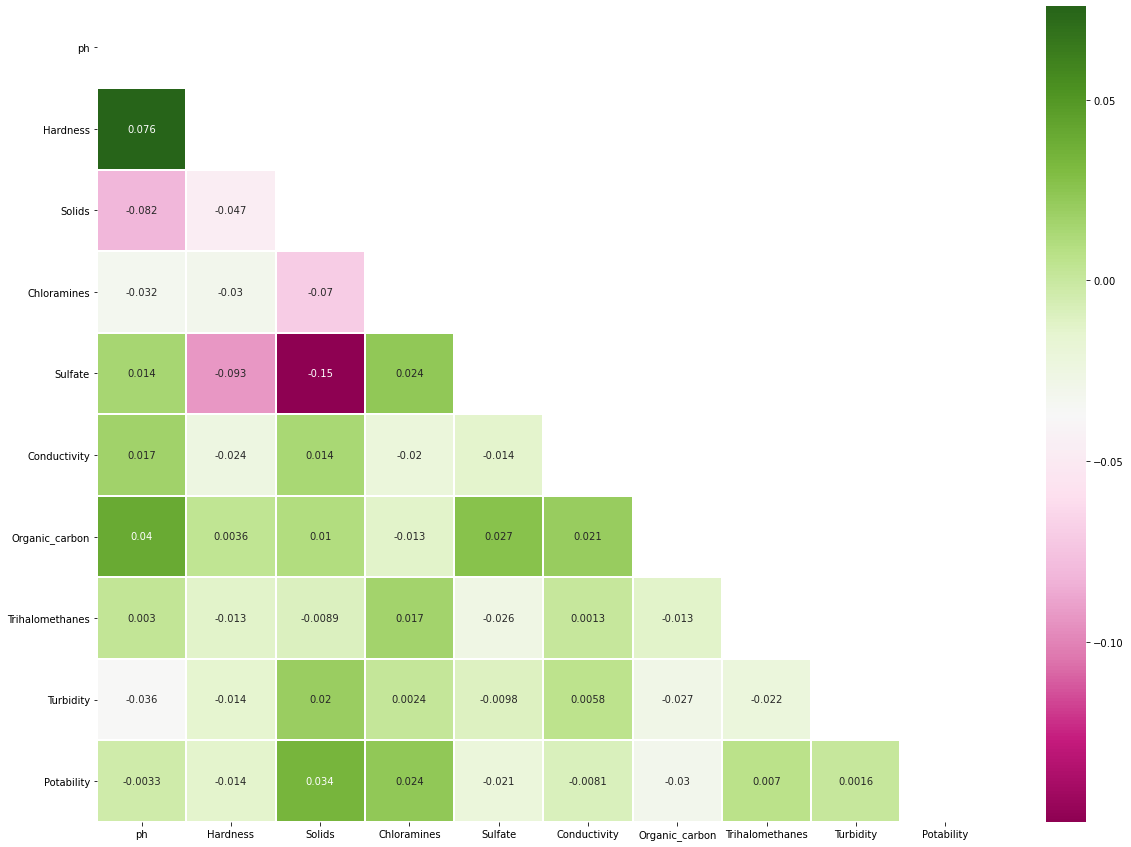

In [12]:
plt.figure(figsize=(20,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,linewidth=1,mask=matrix,cmap='PiYG')

# Splitting the data 

In [13]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



from sklearn.model_selection import train_test_split,cross_val_score, cross_validate,RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from scipy.stats import uniform

In [14]:
# Define our variables and the target label

In [15]:
X = df.drop('Potability', axis = 1)
y = df['Potability']

In [16]:
# Split the original Data into training data and the testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)

X_train.shape,y_train.shape

((2784, 9), (2784,))

In [18]:
# Lets keep the test data aside to use this at the end when our models are fully built.

## Dividing the training data into training and validation data

In [19]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42)


In [20]:
X_train_val.shape,y_train_val.shape

((2227, 9), (2227,))

In [21]:
X_test_val.shape,y_test_val.shape

((557, 9), (557,))

In [22]:
X_train_val.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [23]:
y_train_val.value_counts()

0    1355
1     872
Name: Potability, dtype: int64

# Standardization

In [24]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_val)
X_test_scaled = sc.transform(X_test_val)

In [25]:
X_train_scaled.shape

(2227, 9)

In [26]:
X_train_scaled

array([[-0.73743358,  2.43381818, -0.09902908, ..., -0.77880437,
         1.59935908,  1.43430523],
       [-1.04292337, -0.33320927, -0.22323011, ...,  1.27283817,
        -1.04883996, -0.3639687 ],
       [ 0.85959719,  1.50855095, -1.62001792, ..., -0.06556109,
         1.13670945,  0.59559882],
       ...,
       [ 0.01437914,  1.55285328, -0.36086095, ..., -0.47946153,
        -0.37234435,  0.43759931],
       [-2.09948052,  0.42787999,  1.22676247, ...,  0.05672309,
        -0.483887  ,  0.64436976],
       [ 0.45288338, -0.01619849, -0.93271626, ...,  0.77311091,
         1.42083579, -1.39211827]])

# SVM Model

## Base SVM Model unscaled data

In [27]:
#Initialize the model
SVC_model = SVC(random_state = 0)

# Fitting the model to our features and labels
SVC_model.fit(X_train_val, y_train_val)

# Traning score for the model
SVC_train_score = SVC_model.score(X_train_val,y_train_val)
print('Initial Training Score :',SVC_train_score)

# Predicting the labels for the test dataset
prediction = SVC_model.predict(X_test_val)

# Calculating the test score
SVC_test_score = accuracy_score(y_test_val, prediction)
print('Initial Testing score:',SVC_test_score)

Initial Training Score : 0.6084418500224518
Initial Testing score: 0.6050269299820467


### Classification Report

In [28]:
print(classification_report(y_test_val,prediction, zero_division = True))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       337
           1       1.00      0.00      0.00       220

    accuracy                           0.61       557
   macro avg       0.80      0.50      0.38       557
weighted avg       0.76      0.61      0.46       557



### Confusion Matrix

<AxesSubplot:>

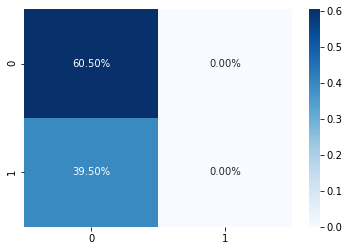

In [29]:
SVC_matrix = confusion_matrix(y_test_val,prediction)
sns.heatmap(SVC_matrix/np.sum(SVC_matrix),annot = True, fmt = '0.2%',cmap='Blues')

## Base SVM Model scaled data

In [30]:
#Initialize the model
SVC_scaled_model = SVC()

# Fitting the model to our features and labels
SVC_scaled_model.fit(X_train_scaled, y_train_val)

# Traning score for the model
SVC_scaled_train_score = SVC_scaled_model.score(X_train_scaled,y_train_val)
print('Scaled Training Score :',SVC_scaled_train_score)

# Predicting the labels for the test dataset
scaled_prediction = SVC_scaled_model.predict(X_test_scaled)

# Calculating the test score
SVC_scaled_test_score = accuracy_score(y_test_val, scaled_prediction)
print('Scaled Testing score:',SVC_scaled_test_score)

Scaled Training Score : 0.7265379434216435
Scaled Testing score: 0.6858168761220825


In [31]:
#Classification Report after scaling

In [32]:
print(classification_report(y_test_val,scaled_prediction, zero_division = True))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       337
           1       0.75      0.30      0.43       220

    accuracy                           0.69       557
   macro avg       0.71      0.62      0.61       557
weighted avg       0.70      0.69      0.64       557



In [33]:
#Confusion Matrix after scaling

<AxesSubplot:>

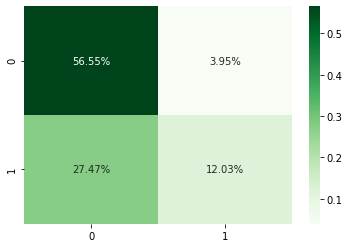

In [34]:
SVC_matrix_scaled = confusion_matrix(y_test_val,scaled_prediction)
sns.heatmap(SVC_matrix_scaled/np.sum(SVC_matrix_scaled),annot = True, fmt = '0.2%',cmap='Greens')

Lets us see if cross validation improves the performance of the our scaled initial model

In [35]:
SVC_cv_model = SVC()

SVC_cv_scores = cross_validate(SVC_cv_model, X_train_scaled, y_train_val,scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'], cv = 10)

SVC_cv_scores = pd.DataFrame(SVC_cv_scores, index = range(1,11))

SVC_cv_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.205214,0.034932,0.677130,0.684004,0.677130,0.637103
2,0.209466,0.034897,0.663677,0.660164,0.663677,0.626220
3,0.205752,0.034818,0.663677,0.662146,0.663677,0.623427
4,0.206238,0.034697,0.663677,0.660164,0.663677,0.626220
5,0.220179,0.035293,0.627803,0.608099,0.627803,0.580024
6,0.209017,0.035133,0.690583,0.718748,0.690583,0.646442
7,0.207630,0.034902,0.677130,0.710541,0.677130,0.622981
8,0.210533,0.035537,0.693694,0.726754,0.693694,0.647319
9,0.209494,0.034862,0.666667,0.689459,0.666667,0.609250
10,0.211424,0.034868,0.662162,0.678014,0.662162,0.605792


In [36]:
SVC_cv_scores.mean()[2:]

test_accuracy              0.668620
test_precision_weighted    0.679809
test_recall_weighted       0.668620
test_f1_weighted           0.622478
dtype: float64

It hasn't acheived a great result compared to above model.

## Hyperparameter Tuning for SVC model

Let us try Random Search method to find the best parameter set in the plane.

In [37]:
# %%time

# SVC_random_model = SVC()

# parameters = {'C':[0.1,0.3,0.5,0.8,1,3,7],
#               # 'C': uniform(1,100),
#               'kernel': ['rbf','sigmoid'],
#               'gamma':['auto','scale']
#              }

# random_search = RandomizedSearchCV(estimator = SVC_random_model,
#                                    param_distributions = parameters,
#                                    cv=3)
# random_search.fit(X_train_val, y_train_val)
# random_search.best_params_

It has been observed that each kernel can choose its parameters easily. Hence each kernel is taken once at a time. And Linear kernel takes a longer time than usual to fit the datapoints. Hence this kernel is skipped in this analysis.

In [38]:
# sheet = pd.DataFrame(random_search.cv_results_)
# sheet[['param_C','param_kernel','mean_test_score']]

In [39]:
# random_model = SVC(C= 1,gamma = 'scale', kernel = 'rbf')
# random_model.fit(X_train_scaled,y_train_val)
# train_random_score=random_model.score(X_train_scaled,y_train_val)
# # Calculating the training score
# print('Random rbf Training Score :',train_random_score)

In [40]:
# %%time

# SVC_random_model = SVC()

# parameters = {'C':[0.1,0.3,0.5,0.8,1,3,7],
#               'kernel': ['poly'],
#               'degree':[1,2,3,4,5]
#              }

# random_search = RandomizedSearchCV(estimator = SVC_random_model,
#                                    param_distributions = parameters,
#                                    cv=3)
# random_search.fit(X_train_val, y_train_val)

# random_search.best_params_

Let us test the model with the parameters which we found are the best.

In [41]:

# random_model = SVC(C= 7,gamma = 'scale', kernel = 'poly',degree= 4)
# random_model.fit(X_train_scaled,y_train_val)
# train_random_score=random_model.score(X_train_scaled,y_train_val)
# # Calculating the training score
# print('Random poly Training Score :',train_random_score)

# # test_random_score = random_model.predict(X_test_scaled)
# # test_random_score = accuracy_score(y_test_val, test_random_score)

# # # Calculating the test score
# # print('Testing score:',test_random_score)

From the above two sets of models, we can observe that the poly kernel performs well with this data.

# Using Grid Search to find the Hyperparameters

In [42]:
# %%time

# C_range = [0.1,1,10,50]

# gamma_range = ['auto','scale']

# kernel_range = ['rbf','linear','poly']

# degree_range = [1,2,3,4,5]

# parameters = dict(gamma = gamma_range, C= C_range, kernel = kernel_range, degree = degree_range)

# grid_SVC = SVC()

# grid = GridSearchCV(grid_SVC, param_grid= parameters, cv=3)

# grid.fit(X_train_scaled, y_train_val)

# grid.best_params_

Applying this parameters to our model to check the performance.

In [43]:
# grid_model = SVC(C= 10,gamma = 'auto', kernel = 'poly',degree= 2)
# grid_model.fit(X_train_scaled,y_train_val)
# train_grid_score=grid_model.score(X_train_scaled,y_train_val)
# # Calculating the training score
# print('Grid Training Score :',train_grid_score)

# # test_grid_score = grid_model.predict(X_test_scaled)
# # test_grid_score = accuracy_score(y_test_val, test_grid_score)

# # # Calculating the test score
# # print('Testing score:',test_grid_score)

From the above two models we can choose Random Search model as our final parameters

In [44]:
# final_parameters = {'C':[76],
#               'kernel': ['rbf'],
#               'gamma':['auto'],
#               'degree':[2]
#              }

## Best Model

In [45]:
# %%time

# best_SVC_model = SVC(C= 1,gamma = 'scale', kernel = 'poly',degree= 4)
# best_SVC_model.fit(X_train_scaled,y_train_val)
# train_best_SVC_score=best_SVC_model.score(X_train_scaled,y_train_val)
# # Calculating the training score
# print('Training Score :',train_best_SVC_score)

# # test_best_score = best_model.predict(X_test_scaled)
# # test_best_score = accuracy_score(y_test_val, test_best_score)

# # # Calculating the test score
# # print('Testing score:',test_final_score)

Our final model is ready and lets apply this on our test data set.

# Standardise the test data set

In [46]:
# scs = StandardScaler()
# X_train = scs.fit_transform(X_train)
# X_test = scs.transform(X_test)

# Running our test model and checking our accuracy

In [47]:
# %%time

# # final_SVC_model = SVC(C= 1,gamma = 'auto', kernel = 'rbf',degree= 2)
# # final_SVC_model.fit(X_train,y_train)
# # train_final_SVC_score=final_SVC_model.score(X_train,y_train)
# # # Calculating the training score
# # print('Training Score :',train_final_SVC_score)

# test_final_SVC = best_SVC_model.predict(X_test)
# test_final_SVC_score = accuracy_score(y_test, test_final_SVC)

# # Calculating the test score
# print('Final Model Testing score:',test_final_SVC_score)

# MLP Model

In [48]:
# pip install skorch

In [49]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping

### We will define the initial parameters needed for our multilayer perceptron

In [50]:
input_dim = X_train_val.shape[1]
hidden_dim = 100
output_dim = 2
dropout = 0.5
activation = F.relu
device ='cpu'

In [51]:
print('Input Size:',input_dim,
      'Hidden Size:', hidden_dim,
      'Output Size:',output_dim)

Input Size: 9 Hidden Size: 100 Output Size: 2


### Building a basic neural network

In [52]:
class MLP(nn.Module):
    def __init__(
            self,
            input_size = input_dim,
            hidden_size = hidden_dim,
            output_size = output_dim,
            dropout = dropout,
            activation = activation
    ):
        super(MLP, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output_size = nn.Linear(hidden_size, output_size)
        
    def forward(self, X):
        X = self.activation(self.fc1(X))
        X = self.dropout(X)
        X = self.activation(self.fc2(X))
        X = self.dropout(X)
        X = F.softmax(self.output_size(X), dim = -1)
        
        return X

Building a model using the network

In [53]:
torch.manual_seed(0)

MLP_model = NeuralNetClassifier(
    MLP,
    max_epochs = 20,
    lr = 0.1,
    device = device)

Converting the double datatype to float datatype

In [54]:

X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)


Fit the model into our dataset

In [55]:
MLP_model.fit(X_train_scaled, y_train_val)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6897       0.6076        0.6728  0.0362
      2        0.6763       0.6076        0.6708  0.0347
      3        0.6774       0.6076        0.6689  0.0348
      4        0.6723       0.6076        0.6678  0.0343
      5        0.6739       0.6076        0.6667  0.0343
      6        0.6704       0.6076        0.6668  0.0344
      7        0.6703       0.6076        0.6654  0.0349
      8        0.6662       0.6076        0.6645  0.0344
      9        0.6696       0.6099        0.6633  0.0351
     10        0.6637       0.6099        0.6616  0.0348
     11        0.6666       0.6099        0.6611  0.0342
     12        0.6641       0.6099        0.6600  0.0374
     13        0.6635       0.6099        0.6591  0.0347
     14        0.6634       0.6099        0.6585  0.0342
     15        0.6636       0.6099        0.6578  0.0342
     16        0.6624       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP(
    (dropout): Dropout(p=0.5, inplace=False)
    (fc1): Linear(in_features=9, out_features=100, bias=True)
    (fc2): Linear(in_features=100, out_features=100, bias=True)
    (output_size): Linear(in_features=100, out_features=2, bias=True)
  ),
)

Let us use this model to predict our target variables and see the predictions on the validation dataset

In [56]:
mlp_pred = MLP_model.predict(X_test_scaled)

mlp_pred_score = accuracy_score(y_test_val, mlp_pred)

print('Initial Testing Score:',mlp_pred_score)

Initial Testing Score: 0.6211849192100538


Early Stopping is found to be useful many scenarios. Hence we will try this on our model

In [57]:
MLP_model = NeuralNetClassifier(
    MLP,
    lr = 1,
    max_epochs = 100,
    callbacks = [EarlyStopping()]
    )

In [58]:
MLP_model.fit(X_train_scaled,y_train_val)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6919       0.6076        0.6842  0.0344
      2        0.6686       0.6076        0.6707  0.0343
      3        0.6647       0.6076        0.6632  0.0340
      4        0.6523       0.6233        0.6552  0.0344
      5        0.6488       0.6323        0.6458  0.0341
      6        0.6423       0.6233        0.6408  0.0339
      7        0.6437       0.6413        0.6348  0.0340
      8        0.6470       0.6368        0.6362  0.0338
      9        0.6331       0.6323        0.6403  0.0340
     10        0.6356       0.6390        0.6331  0.0362
     11        0.6355       0.6525        0.6296  0.0340
     12        0.6398       0.6435        0.6337  0.0342
     13        0.6214       0.6547        0.6322  0.0340
     14        0.6149       0.6457        0.6380  0.0339
     15        0.6209       0.6592        0.6306  0.0340
Stopping since valid_loss has n

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP(
    (dropout): Dropout(p=0.5, inplace=False)
    (fc1): Linear(in_features=9, out_features=100, bias=True)
    (fc2): Linear(in_features=100, out_features=100, bias=True)
    (output_size): Linear(in_features=100, out_features=2, bias=True)
  ),
)

In [59]:
mlp_pred = MLP_model.predict(X_test_scaled)

mlp_pred_score = accuracy_score(y_test_val, mlp_pred)

print('Testing Score after using Early Stopping:',mlp_pred_score)

Testing Score after using Early Stopping: 0.6642728904847397


It indeed increased the performance of our model.

Lets Check if Cross Validation can improve our model.

In [60]:
scores = cross_validate(MLP_model, X_train_scaled, y_train_val, scoring = 'accuracy', cv =4)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6983       0.6078        0.6740  0.0275
      2        0.6741       0.6108        0.6699  0.0269
      3        0.6663       0.6078        0.6659  0.0260
      4        0.6589       0.6317        0.6638  0.0267
      5        0.6574       0.6228        0.6683  0.0264
      6        0.6498       0.6198        0.6648  0.0259
      7        0.6378       0.6347        0.6486  0.0267
      8        0.6387       0.6407        0.6495  0.0263
      9        0.6177       0.6407        0.6586  0.0262
     10        0.6318       0.6437        0.6562  0.0262
     11        0.6267       0.6347        0.6450  0.0265
     12        0.6277       0.6437        0.6409  0.0263
     13        0.6263       0.6617        0.6387  0.0259
     14        0.6084       0.6347        0.6515  0.0262
     15        0.5961       0.6347        0.6475  0.0261
     16        0.6073       0.6

In [61]:
scores

{'fit_time': array([0.62810397, 0.62986803, 0.51697111, 0.61341095]),
 'score_time': array([0.0053122 , 0.00527716, 0.00532413, 0.00549102]),
 'test_score': array([0.65888689, 0.64452424, 0.68043088, 0.55215827])}

From the scores of the cross validation process, we can observe that the performance of the model hasn't changed much on an average. 

# MLP Hyperparameter Optimization

In [65]:
# Setting a base model without any parameters

#criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()

MLP_model = NeuralNetClassifier(
    MLP,
    criterion = criterion,
    callbacks = [EarlyStopping()]
    )

## Using Random Search to find the best parameters

In [66]:

MLP_model.set_params(verbose=0)

params = {   'lr': [0.0001,0.001,0.01],
             'batch_size': [250,300,350],
             'optimizer':[optim.Adam, optim.SGD],
             'module__hidden_size': [50,100,200],
             'module__dropout': [0.2,0.3,0.5],
             'module__activation':[F.relu, F.selu,F.leaky_relu],
             'max_epochs': [200,400,500]
         }

random_MLP = RandomizedSearchCV(MLP_model,
                           params,
                           cv=3,
                           scoring = 'accuracy')

random_MLP.fit(X_train_scaled, y_train_val);

In [67]:
random_MLP.best_score_, random_MLP.best_params_

(0.643025833203339,
 {'optimizer': torch.optim.adam.Adam,
  'module__hidden_size': 100,
  'module__dropout': 0.5,
  'module__activation': <function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>,
  'max_epochs': 400,
  'lr': 0.01,
  'batch_size': 350})

## Using Grid Search to find the best parameters

In [68]:
%%time
MLP_model.set_params()

params = {'lr': [0.001,0.01],
         'optimizer':[optim.Adam, optim.SGD],
         'batch_size': [250,300,350],
         'max_epochs': [500],
         'module__hidden_size': [50,100,150],
         'module__dropout': [0.3,0.4,0.5]
         }

grid_MLP = GridSearchCV(MLP_model,
                       params,
                       cv=3,
                       scoring = "accuracy"
                       )


grid_MLP.fit(X_train_scaled, y_train_val)

CPU times: user 20min 2s, sys: 26 s, total: 20min 28s
Wall time: 1h 45min 14s


GridSearchCV(cv=3,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
),
             param_grid={'batch_size': [250, 300, 350], 'lr': [0.001, 0.01],
                         'max_epochs': [500],
                         'module__dropout': [0.3, 0.4, 0.5],
                         'module__hidden_size': [50, 100, 150],
                         'optimizer': [<class 'torch.optim.adam.Adam'>,
                                       <class 'torch.optim.sgd.SGD'>]},
             scoring='accuracy')

In [69]:
grid_MLP.best_score_, grid_MLP.best_params_

(0.657395953124641,
 {'batch_size': 300,
  'lr': 0.001,
  'max_epochs': 500,
  'module__dropout': 0.4,
  'module__hidden_size': 150,
  'optimizer': torch.optim.adam.Adam})

# Best Model 

Let us re build our base model with the values obtained from the GridSearchCV method.

In [70]:
input_dim = X_train_val.shape[1]
hidden_dim = 50
output_dim = 2
dropout = 0.5
activation = F.relu

In [71]:
class MLP(nn.Module):
    def __init__(
            self,
            input_size = input_dim,
            hidden_size = hidden_dim,
            output_size = output_dim,
            dropout = dropout,
            activation = activation
    ):
        super(MLP, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output_size = nn.Linear(hidden_size, output_size)
        
    def forward(self, X):
        X = self.activation(self.fc1(X))
        X = self.dropout(X)
        X = self.activation(self.fc2(X))
        X = self.dropout(X)
        X = F.softmax(self.output_size(X), dim = -1)
        
        return X

From the above methods we can determine the best parameters suited for our model.

In [72]:
# Best Parameters
batch_size = 250
lr = 0.001
epochs = 500
optimizer = optim.Adam
# criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()

Building our final model with the parameters choosen above

In [73]:
torch.manual_seed(0)

MLP_best = NeuralNetClassifier(
            MLP,
            max_epochs = epochs,
            batch_size = batch_size,
            optimizer = optimizer,
            criterion = criterion,
            lr = lr,
            callbacks = [EarlyStopping()]
            )
MLP_best.fit(X_train_scaled, y_train_val)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6839       0.6076        0.6812  0.0397
      2        0.6810       0.6076        0.6766  0.0405
      3        0.6760       0.6076        0.6740  0.0421
      4        0.6757       0.6076        0.6723  0.0301
      5        0.6741       0.6076        0.6712  0.0556
      6        0.6744       0.6076        0.6705  0.0564
      7        0.6696       0.6076        0.6699  0.0433
      8        0.6718       0.6076        0.6693  0.0281
      9        0.6718       0.6076        0.6688  0.0318
     10        0.6705       0.6076        0.6683  0.0375
     11        0.6694       0.6076        0.6677  0.0289
     12        0.6681       0.6076        0.6668  0.0307
     13        0.6689       0.6076        0.6659  0.0276
     14        0.6665       0.6076        0.6650  0.0281
     15        0.6639       0.6076        0.6641  0.0278
     16        0.6680       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP(
    (dropout): Dropout(p=0.5, inplace=False)
    (fc1): Linear(in_features=9, out_features=50, bias=True)
    (fc2): Linear(in_features=50, out_features=50, bias=True)
    (output_size): Linear(in_features=50, out_features=2, bias=True)
  ),
)

In [75]:
MLP_best_pred = MLP_best.predict(X_test_scaled)

MLP_best_pred_score = accuracy_score(y_test_val, MLP_best_pred)

print('Final Testing Score on train data:',MLP_best_pred_score)

Final Testing Score on train data: 0.6912028725314183


# Standardise the test data set

In [76]:
scs = StandardScaler()
X_train = scs.fit_transform(X_train)
X_test = scs.transform(X_test)

In [78]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Running our test model and checking our accuracy

In [80]:
final_MLP_model = MLP_best.predict(X_test)

final_MLP_model_score = accuracy_score(y_test, final_MLP_model)

print('Final Testing Score on testing data:',final_MLP_model_score)



Final Testing Score on testing data: 0.676829268292683


Final Results from both the models

In [81]:
print('Final Model Testing score:',test_final_SVC_score)
print('Final Testing Score on testing data:',final_MLP_model_score)


NameError: name 'test_final_SVC_score' is not defined

# 